In [2]:
library(tidyverse)

── Attaching packages ────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.8
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ───────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [5]:
data <- read_csv("Tallo.csv")

Rows: 498838 Columns: 13
── Column specification ───────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (7): tree_id, division, family, genus, species, height_outlier, crown_ra...
dbl (6): latitude, longitude, stem_diameter_cm, height_m, crown_radius_m, re...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [8]:
c("Simon", "Niklas", sample(c("Mike", "Robin", "Max", "Markus")), "Andreas")

[1] "Simon"   "Niklas"  "Robin"   "Markus"  "Max"     "Mike"    "Andreas"

In [6]:
data %>% count(species) %>% arrange(-n)

species,n
<chr>,<int>
NA,61230
Quercus ilex,22760
Pinus sylvestris,18221
Pinus halepensis,14003
Pinus pinaster,11766
Quercus infectoria,10964
Fagus sylvatica,9470
Pinus nigra,7365
Picea abies,6723


In [23]:
filtered_data <- data %>% filter(!is.na(species)) %>% add_count(species) %>% filter(n >= 5000) %>% filter(family != "Sapindaceae")

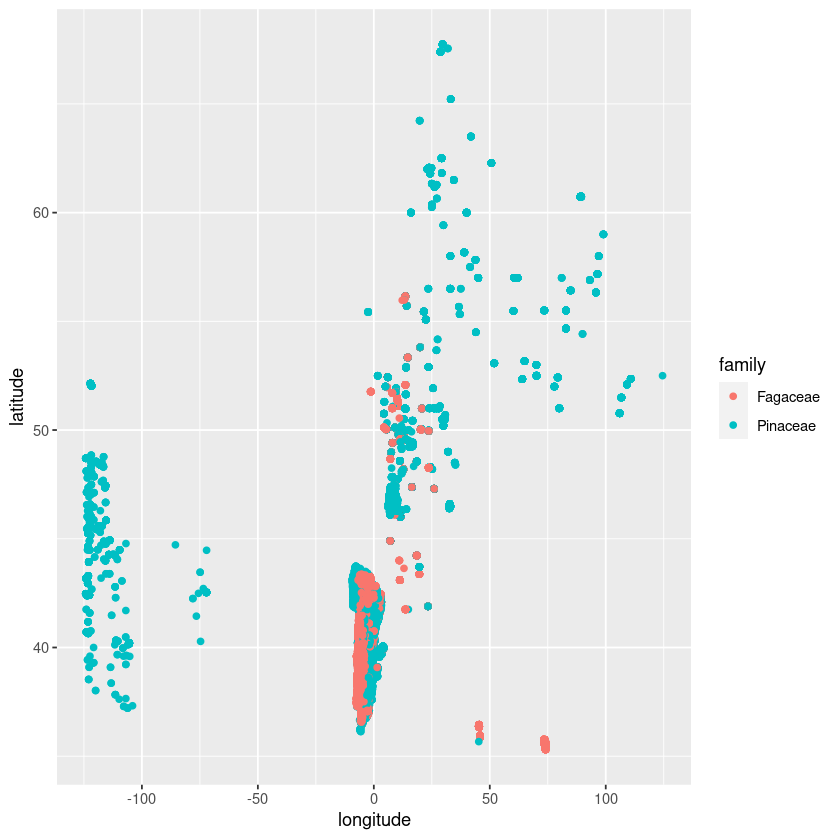

In [24]:
filtered_data %>% ggplot(aes(longitude, latitude, color=family)) + geom_point()

In [39]:
options(repr.plot.width = 12, repr.plot.res=150)

In [45]:
theme_set(theme_light())

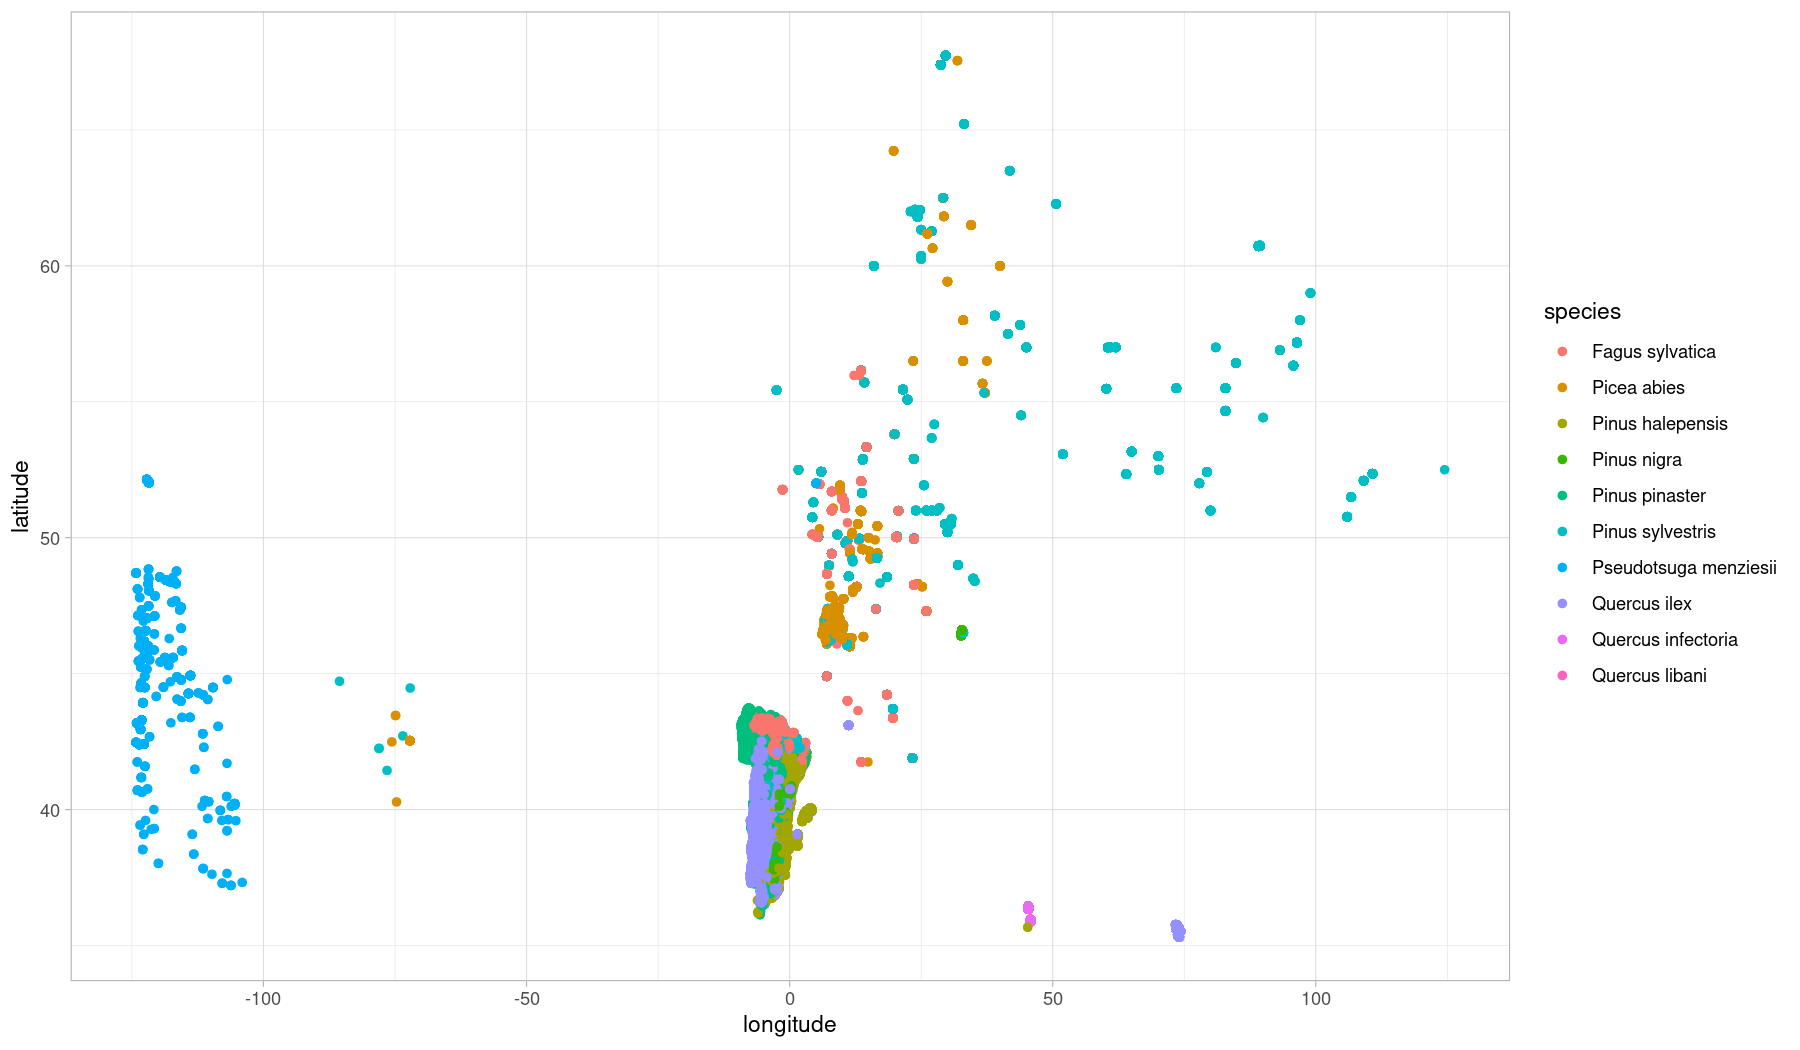

In [46]:
filtered_data %>% ggplot(aes(longitude, latitude, color = species)) + geom_point()

Warning message:
“Removed 826 rows containing missing values (geom_point).”


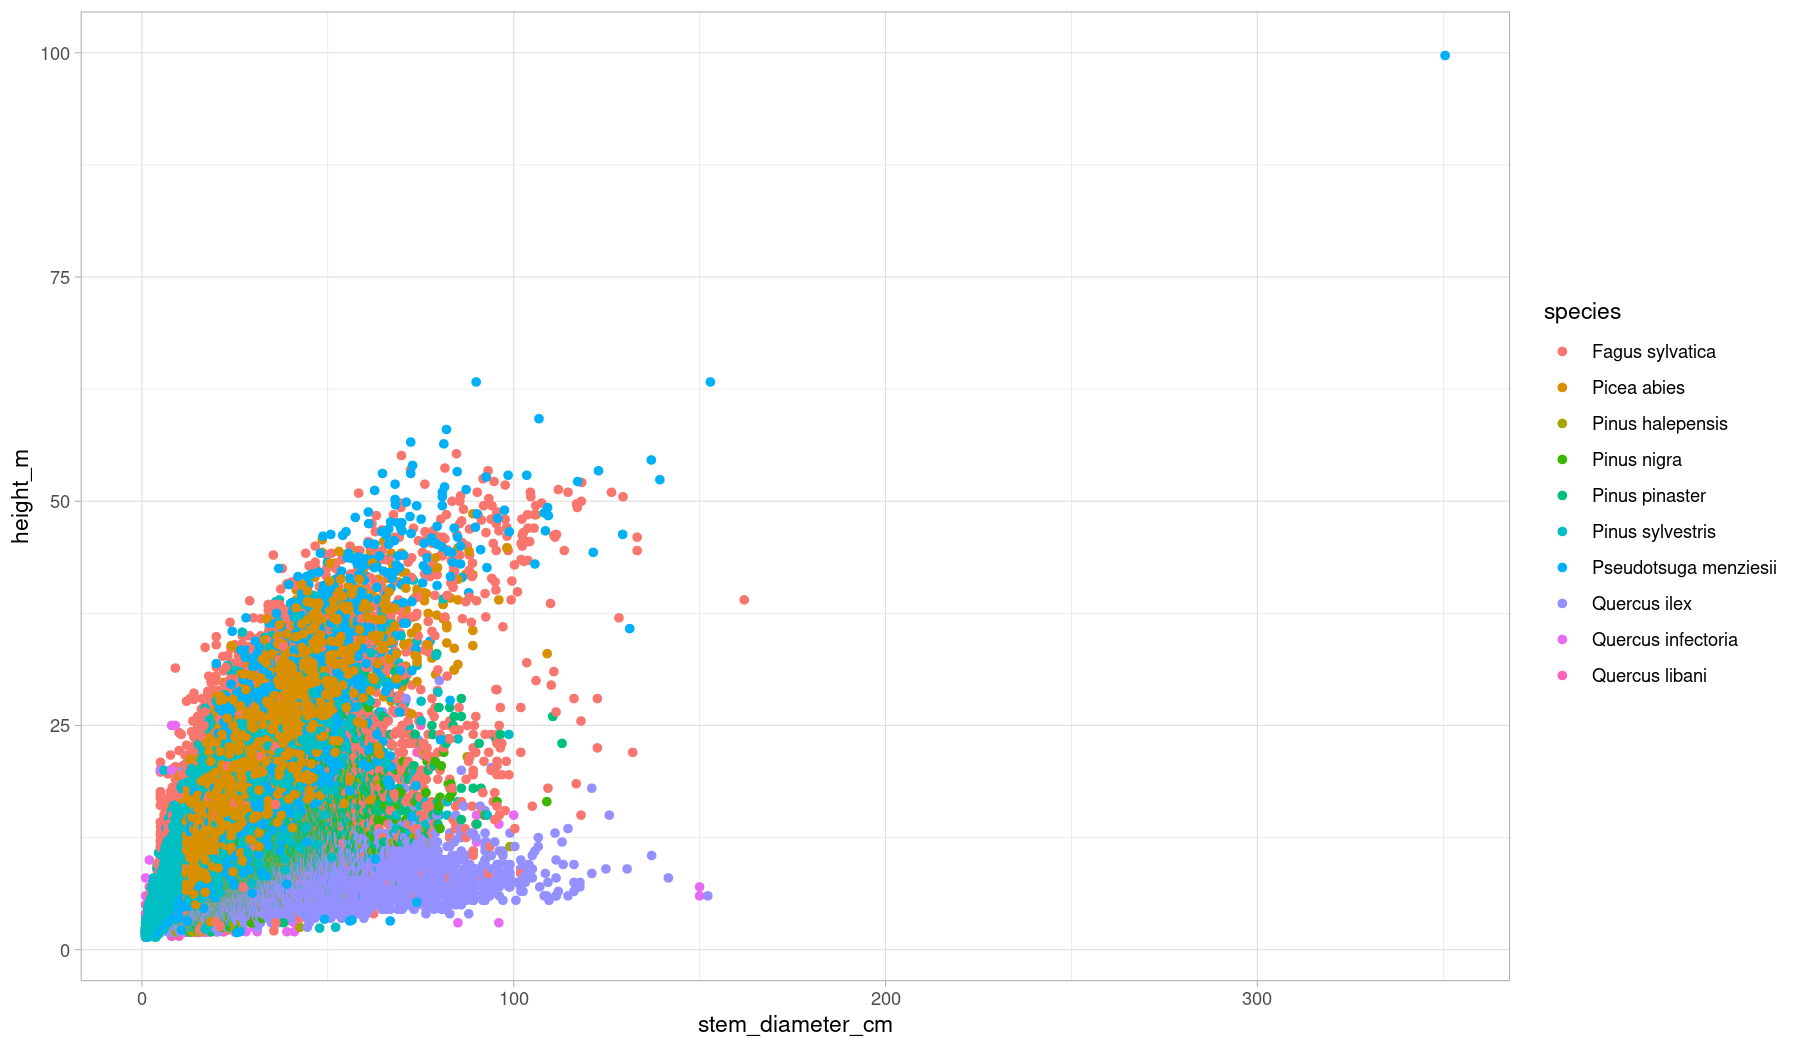

In [47]:
filtered_data %>% ggplot(aes(stem_diameter_cm, height_m, color = species)) + geom_point()

Warning message:
“Removed 567 rows containing missing values (geom_point).”


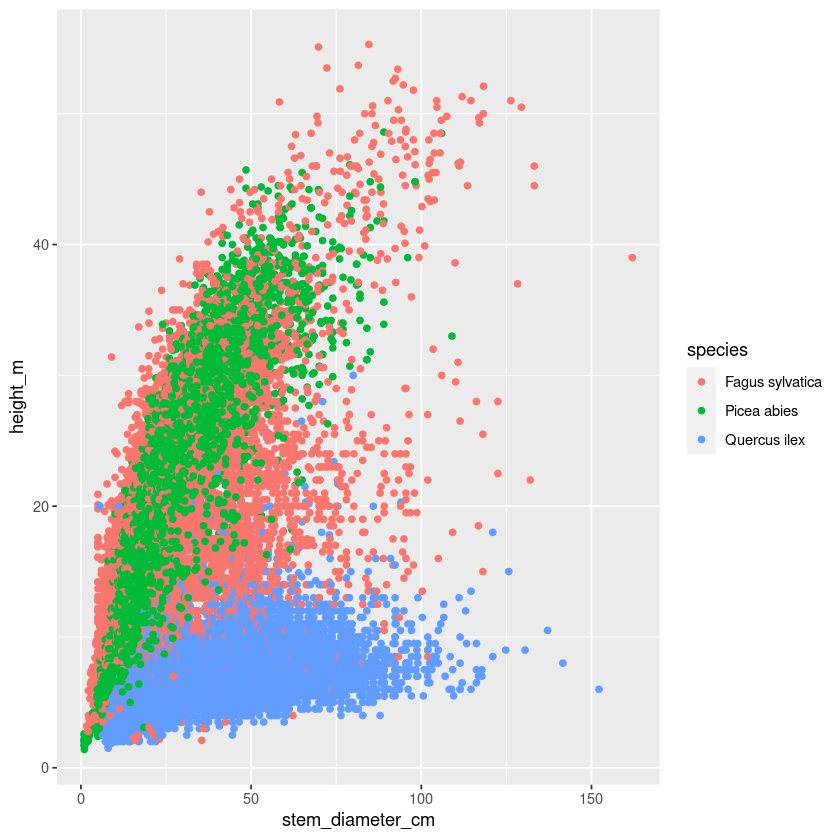

In [29]:
filtered_data %>% filter(species %in% c("Fagus sylvatica", "Quercus ilex", "Picea abies")) %>% ggplot(aes(stem_diameter_cm, height_m, color = species)) + geom_point()

In [48]:
filtered_species <- filtered_data %>% filter(species %in% c("Fagus sylvatica", "Quercus ilex", "Pinus pinaster"))

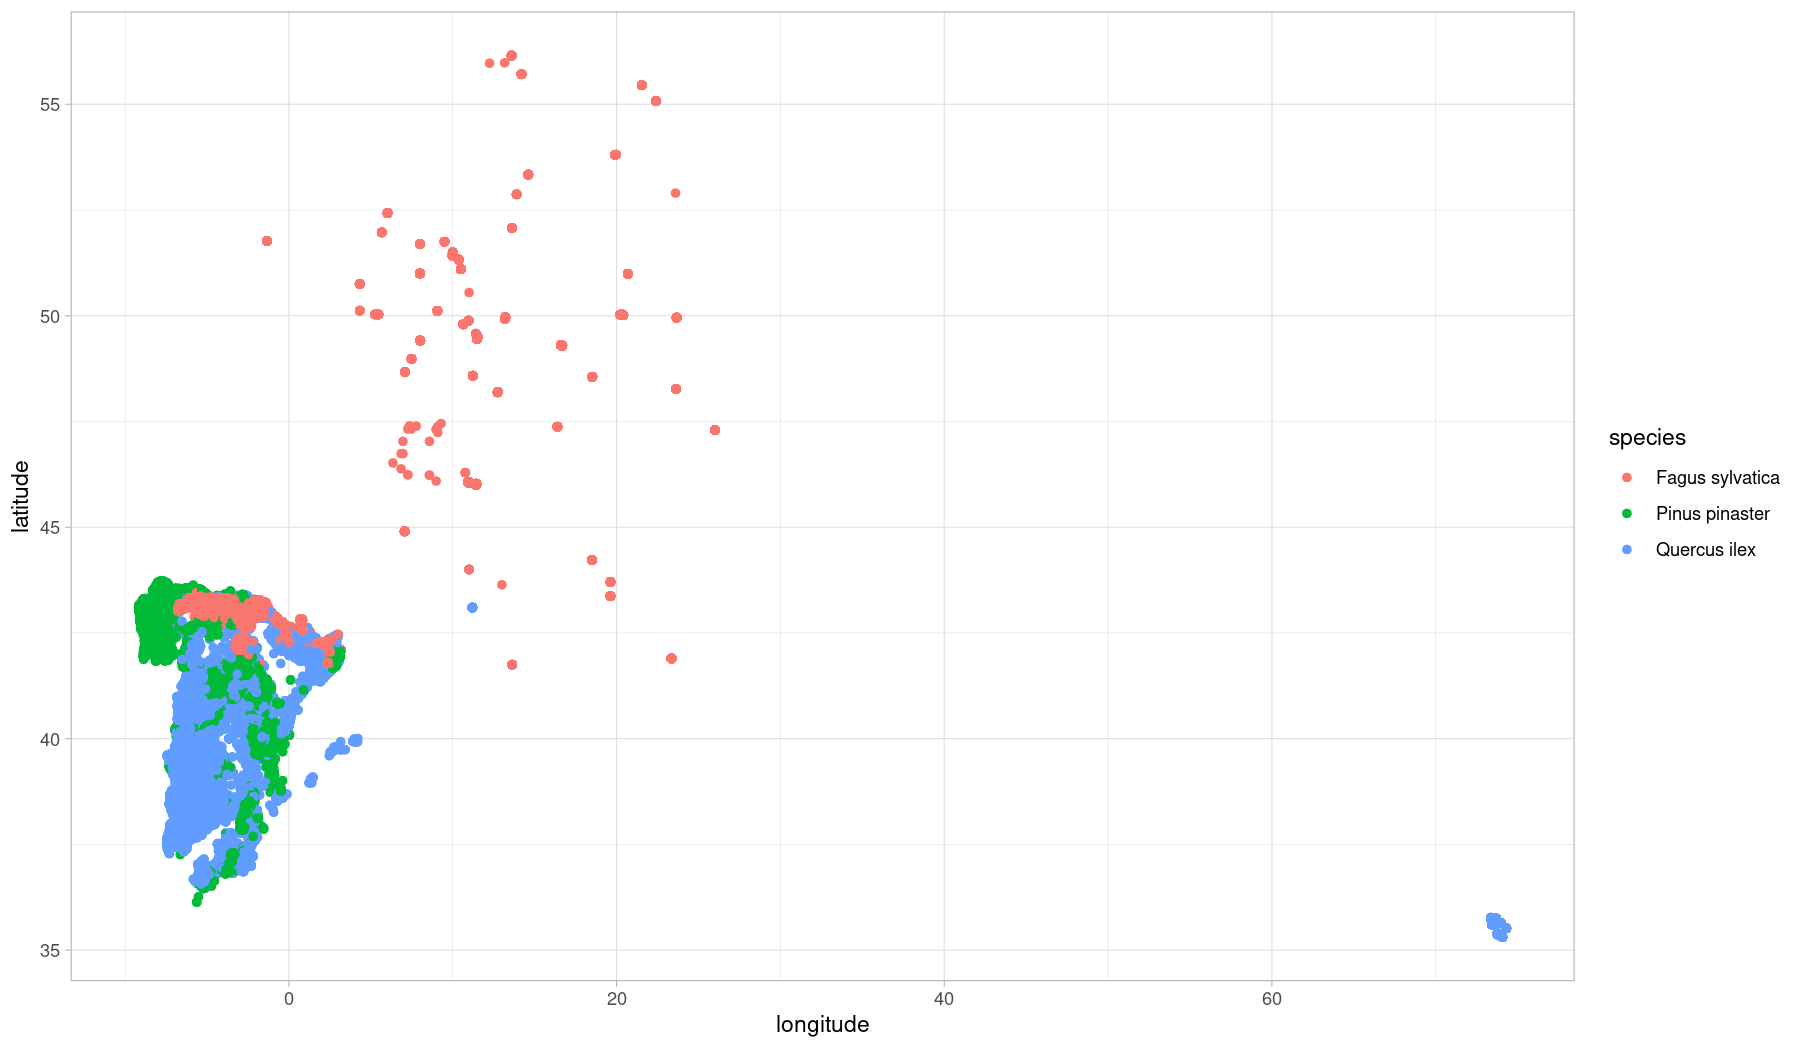

In [49]:
filtered_species %>% ggplot(aes(longitude, latitude, color=species)) + geom_point()

Warning message:
“Removed 534 rows containing missing values (geom_point).”


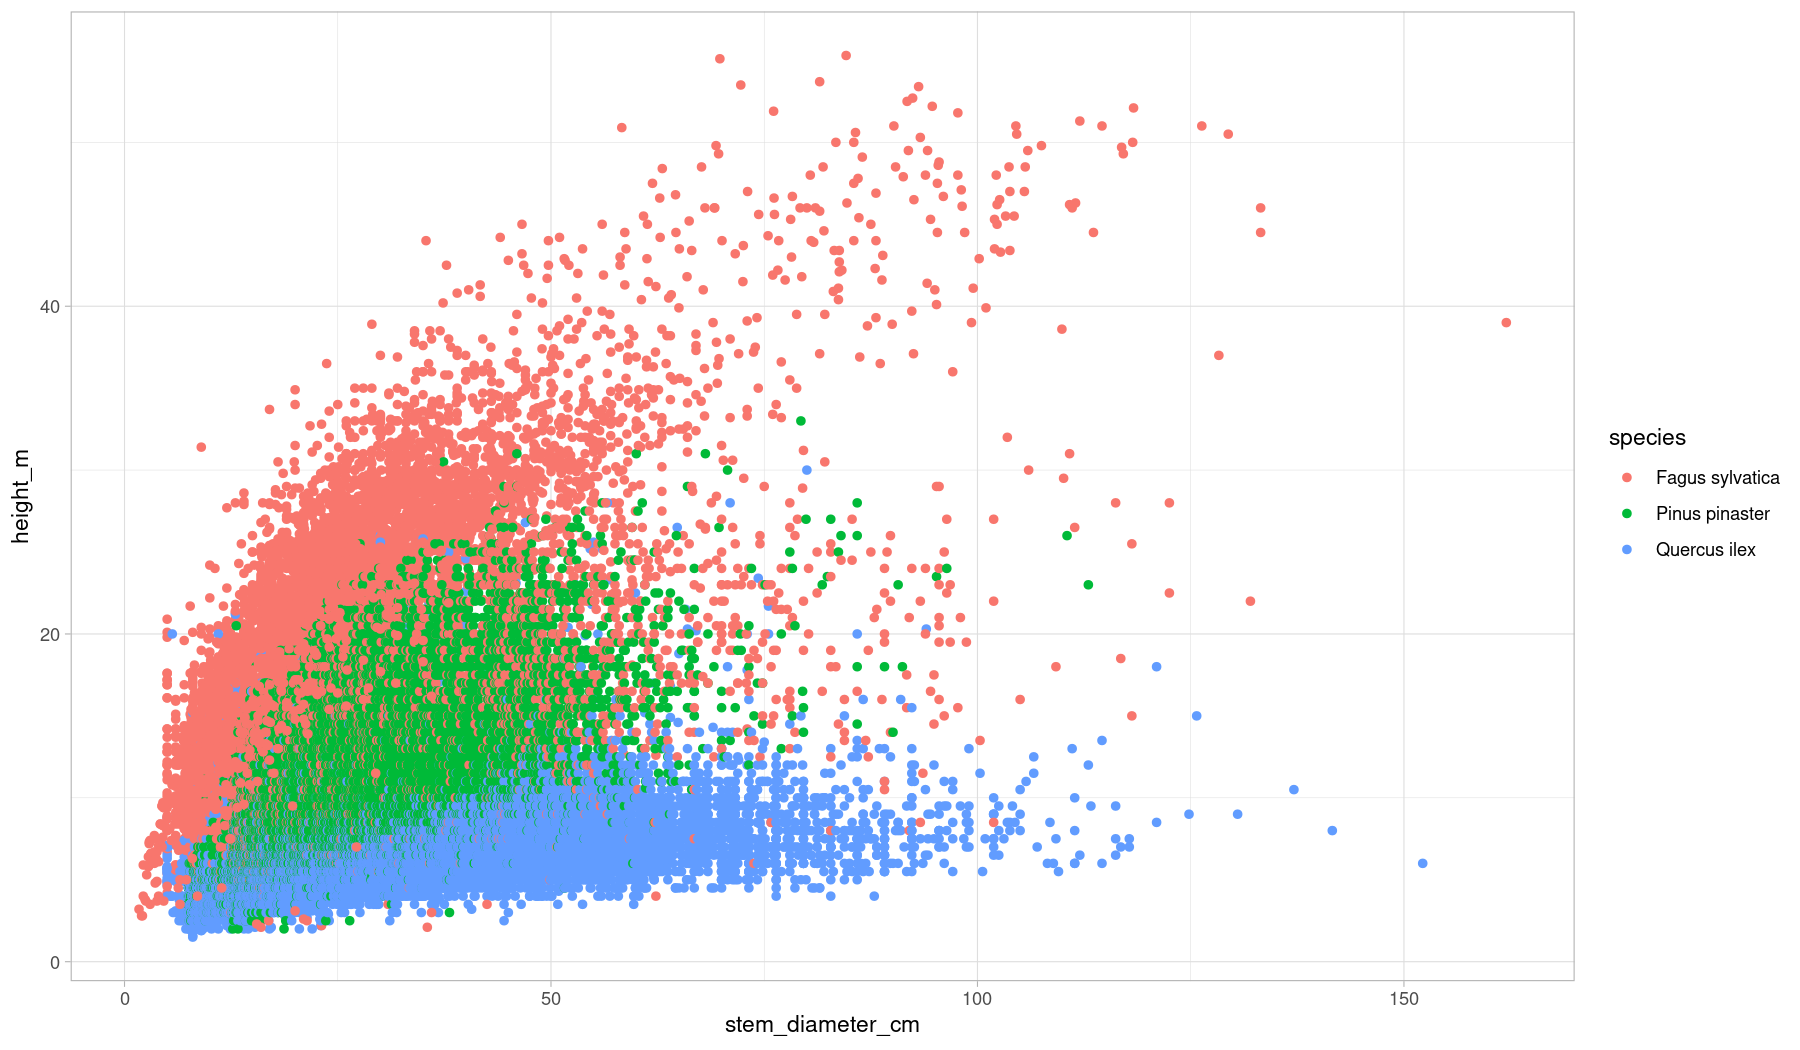

In [51]:
filtered_species %>% ggplot(aes(stem_diameter_cm, height_m, color=species)) + geom_point() 

Warning message:
“Removed 534 rows containing missing values (geom_point).”


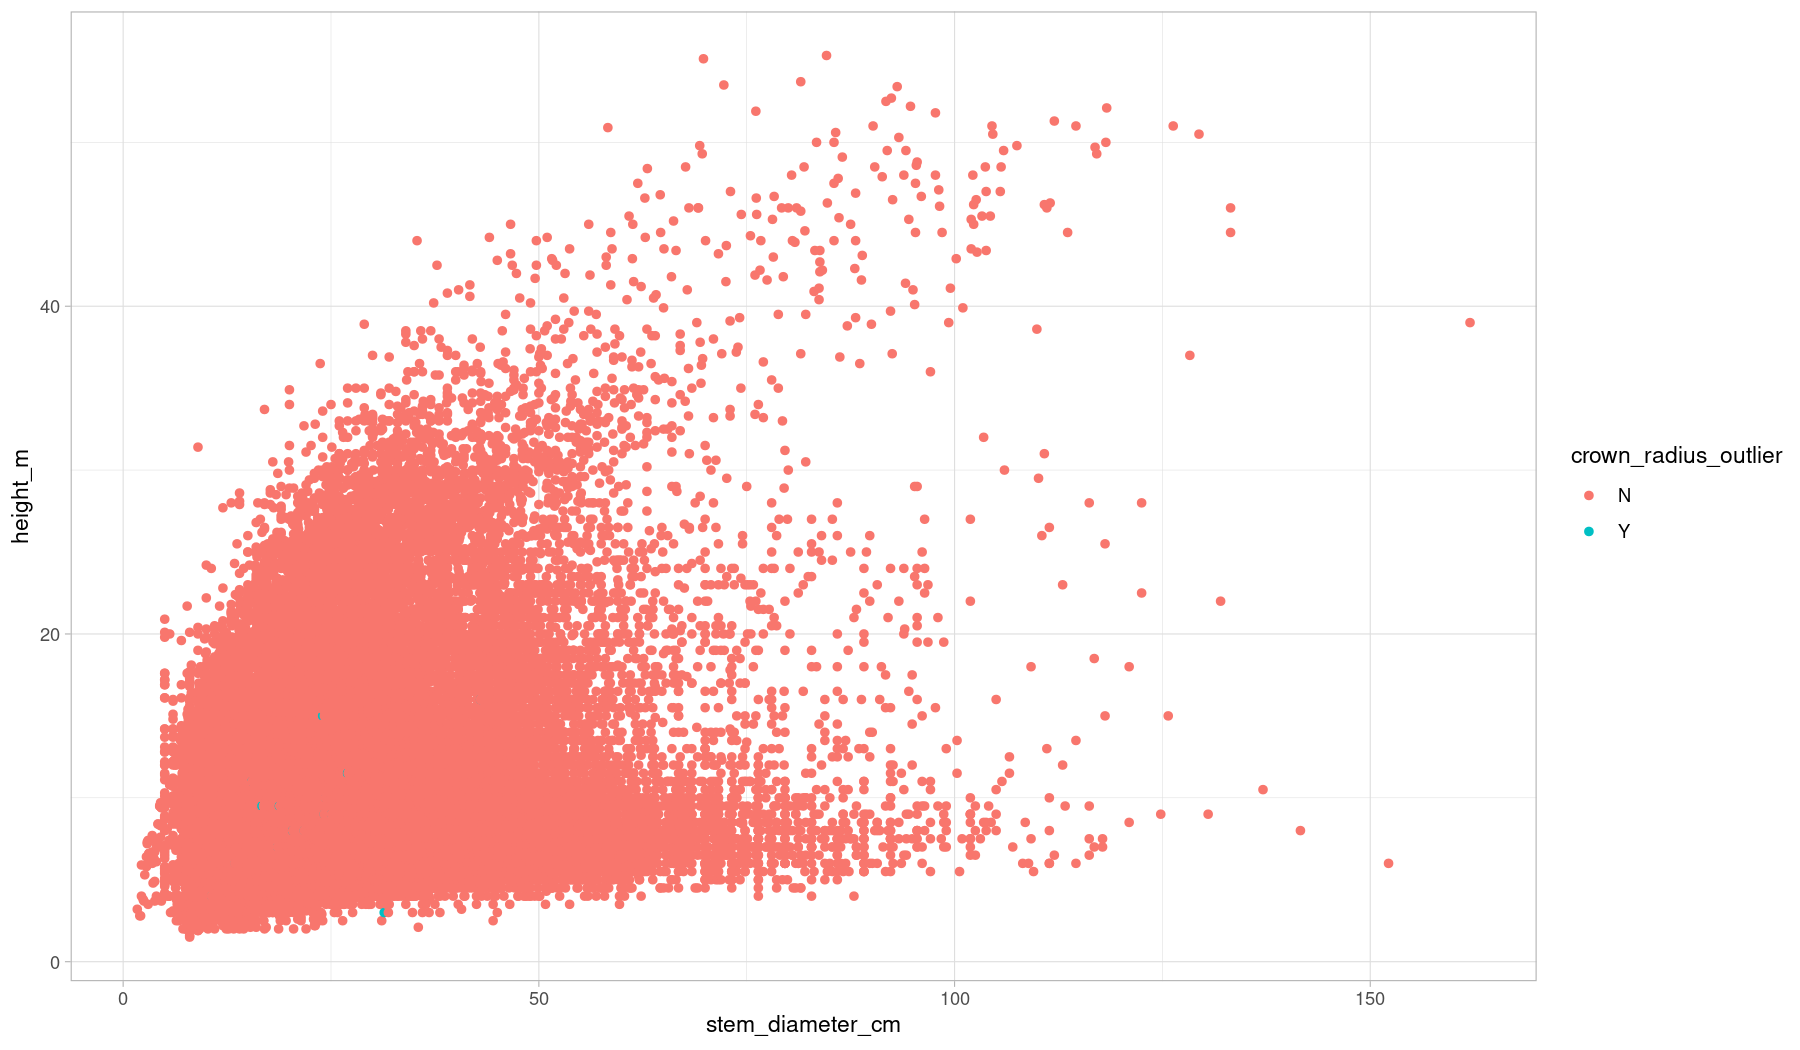

In [53]:
filtered_species %>% ggplot(aes(stem_diameter_cm, height_m, color=crown_radius_outlier)) + geom_point() 

Warning message:
“Removed 4722 rows containing missing values (geom_point).”


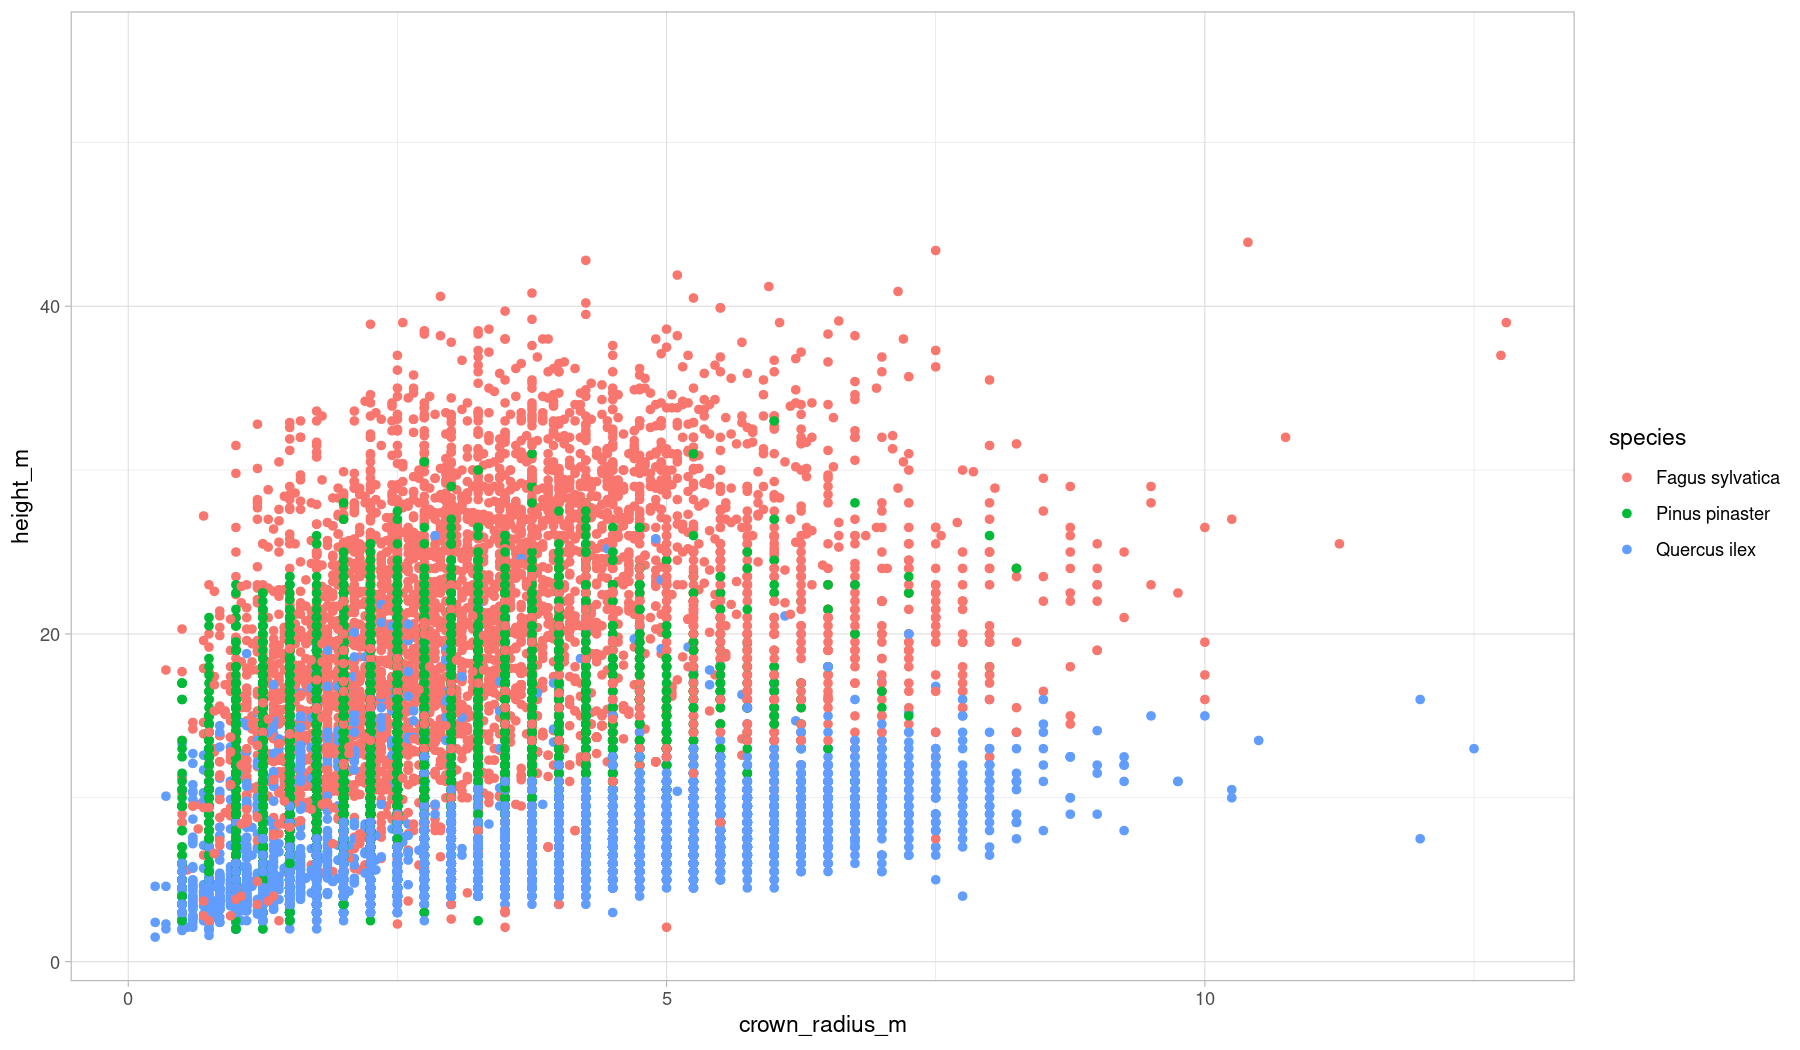

In [56]:
filtered_species %>% ggplot(aes(crown_radius_m, height_m, color=species)) + geom_point() 

In [ ]:
filtered_species %>% ggplot(aes(stem_diameter_cm, height_m, color=crown_radius_outlier)) + geom_point() 

In [59]:
filtered_species %>% group_by(species) %>% summarize(mean(stem_diameter_cm), sd(stem_diameter_cm), var(stem_diameter_cm)) -> hans


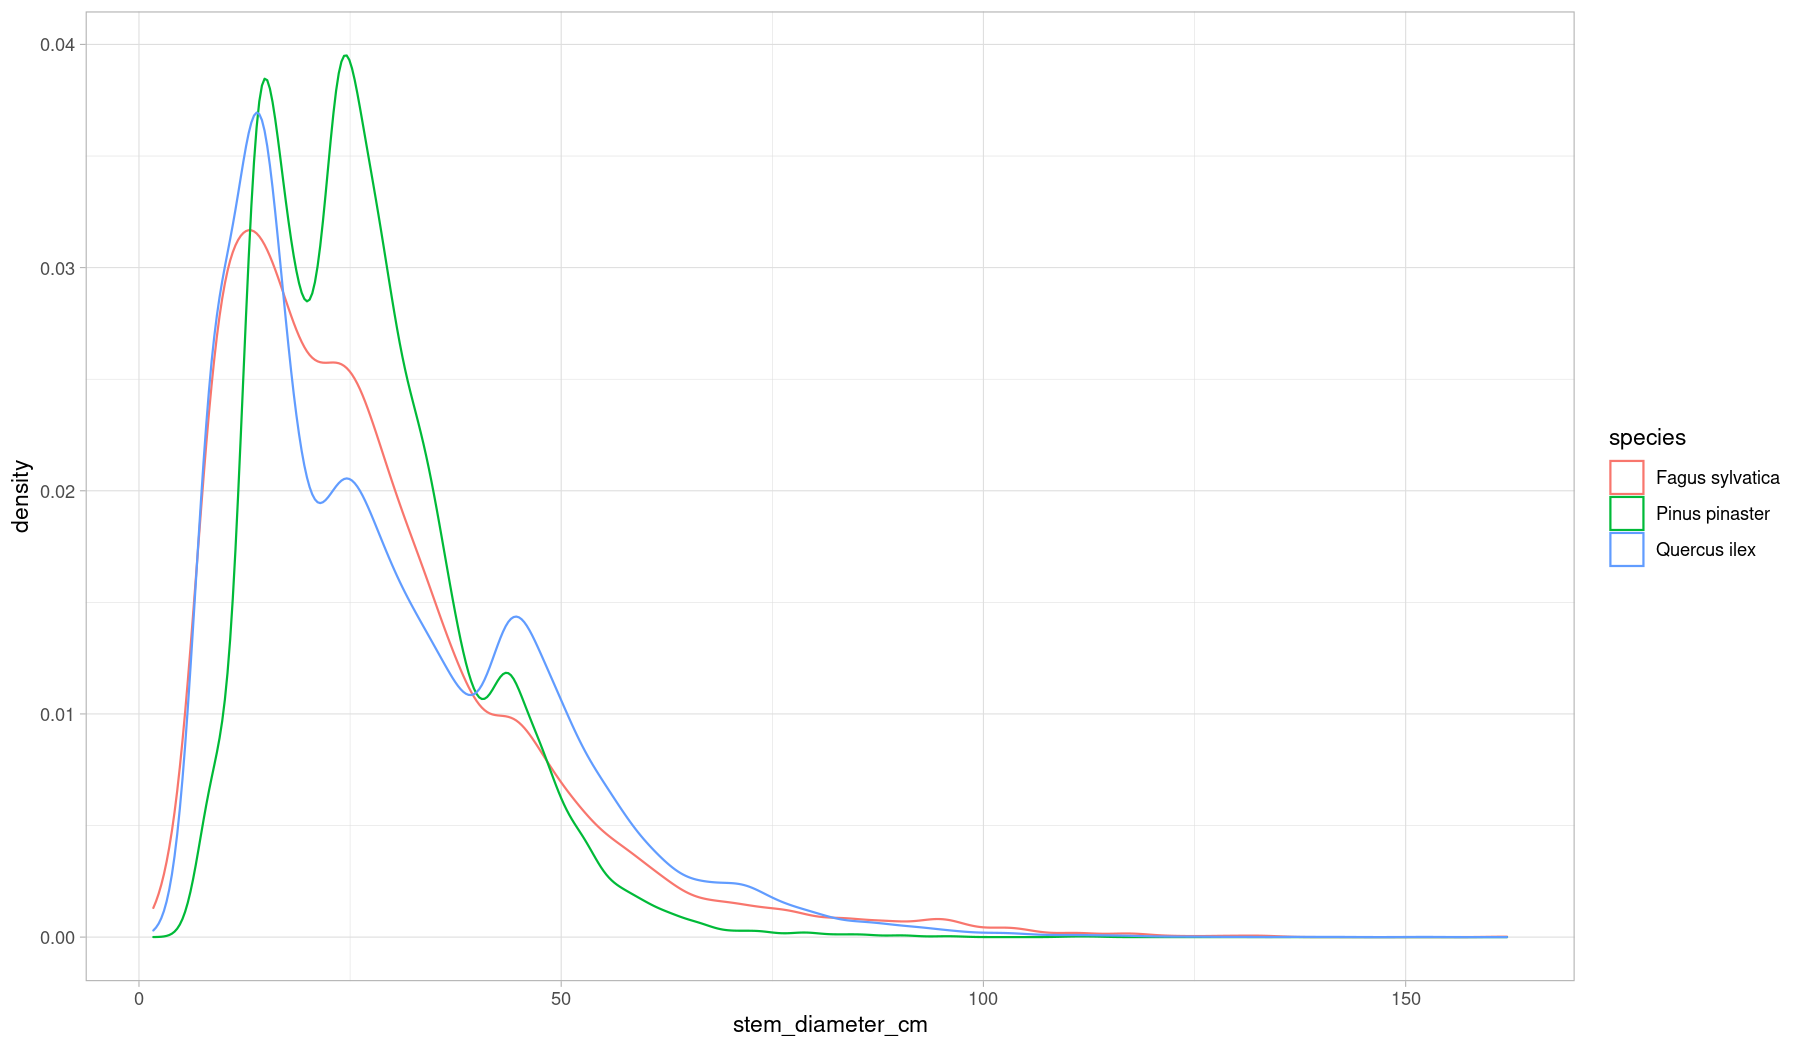

In [60]:
filtered_species %>% ggplot(aes(stem_diameter_cm, color = species))+ geom_density()  

In [68]:
filtered_species %>% group_by(species) %>% summarize(mean(height_m,na.rm = T), sd(height_m,na.rm = T), var(height_m,na.rm = T)) -> dieter


In [69]:
dieter

species,"mean(height_m, na.rm = T)","sd(height_m, na.rm = T)","var(height_m, na.rm = T)"
<chr>,<dbl>,<dbl>,<dbl>
Fagus sylvatica,19.675126,8.038170,64.612176
Pinus pinaster,10.939198,4.668945,21.799052
Quercus ilex,6.327681,2.469029,6.096105


Warning message:
“Removed 534 rows containing non-finite values (stat_density).”


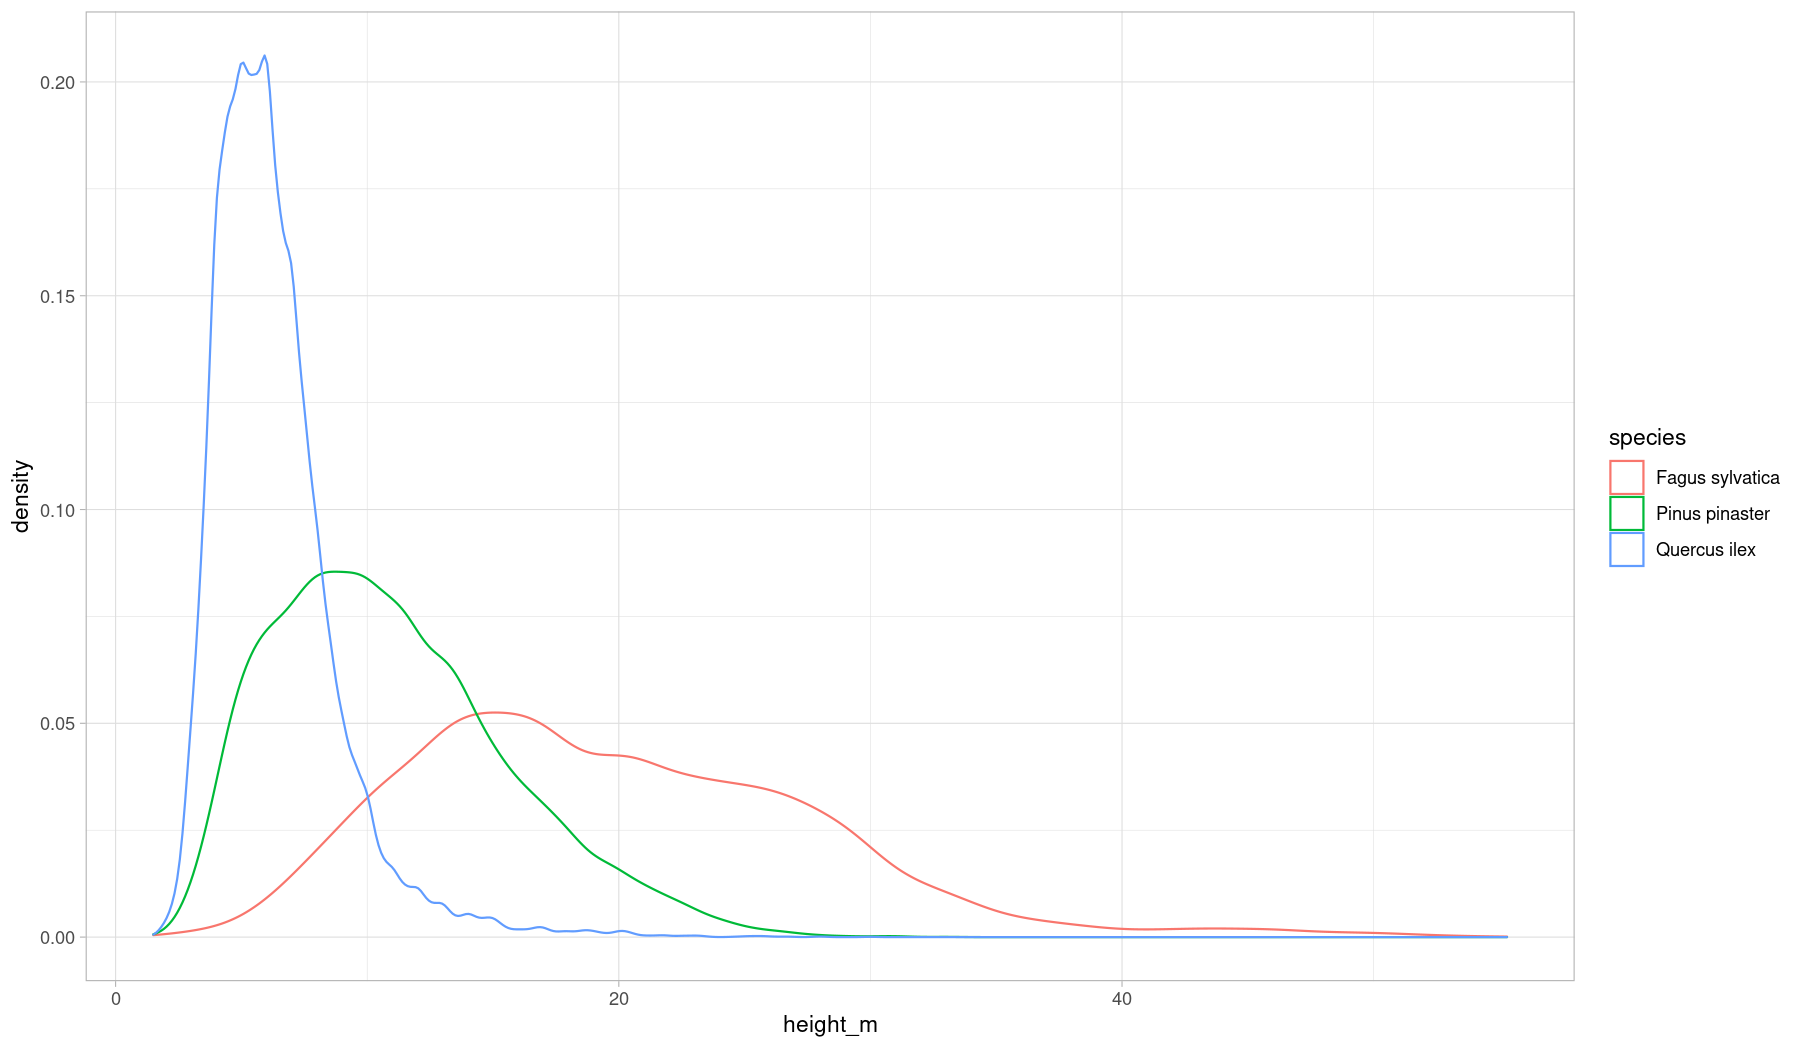

In [70]:
filtered_species %>% ggplot(aes(height_m, color = species))+ geom_density()  

Warning message:
“Removed 4188 rows containing non-finite values (stat_density).”


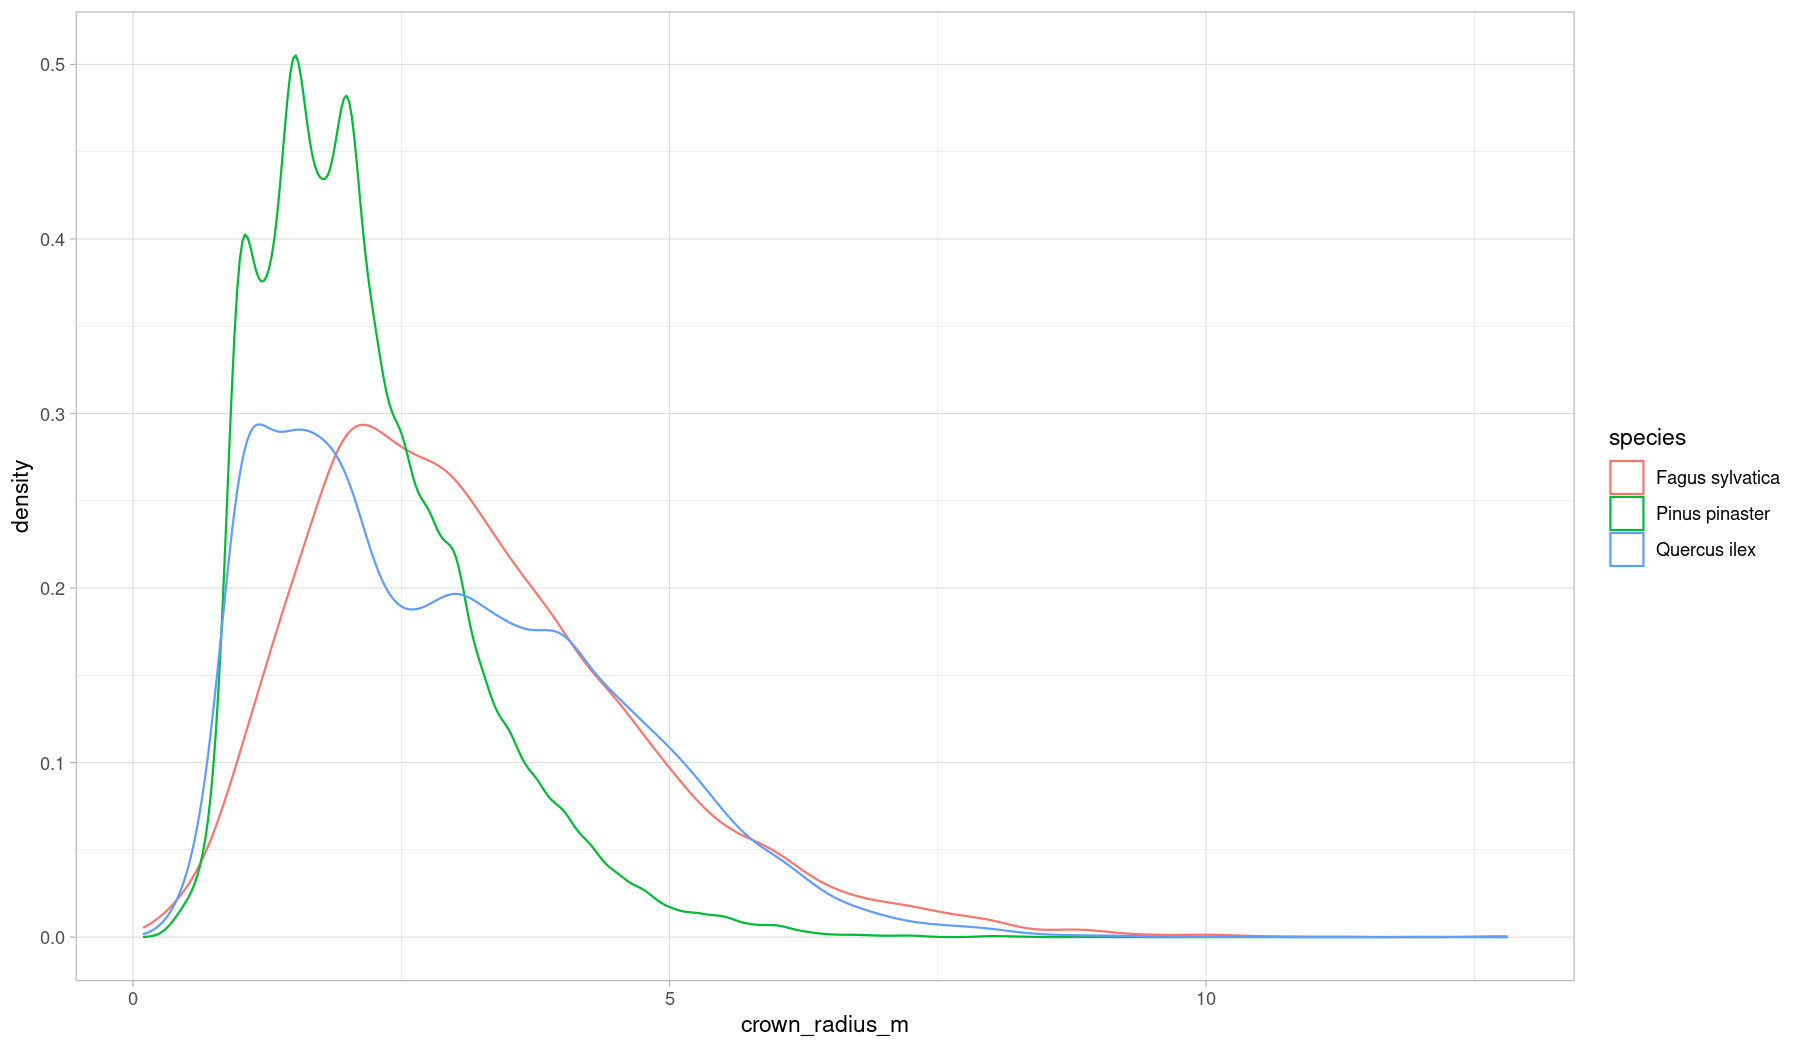

In [71]:
filtered_species %>% ggplot(aes(crown_radius_m, color = species))+ geom_density()  

Warning message:
“Removed 4722 rows containing non-finite values (stat_density).”


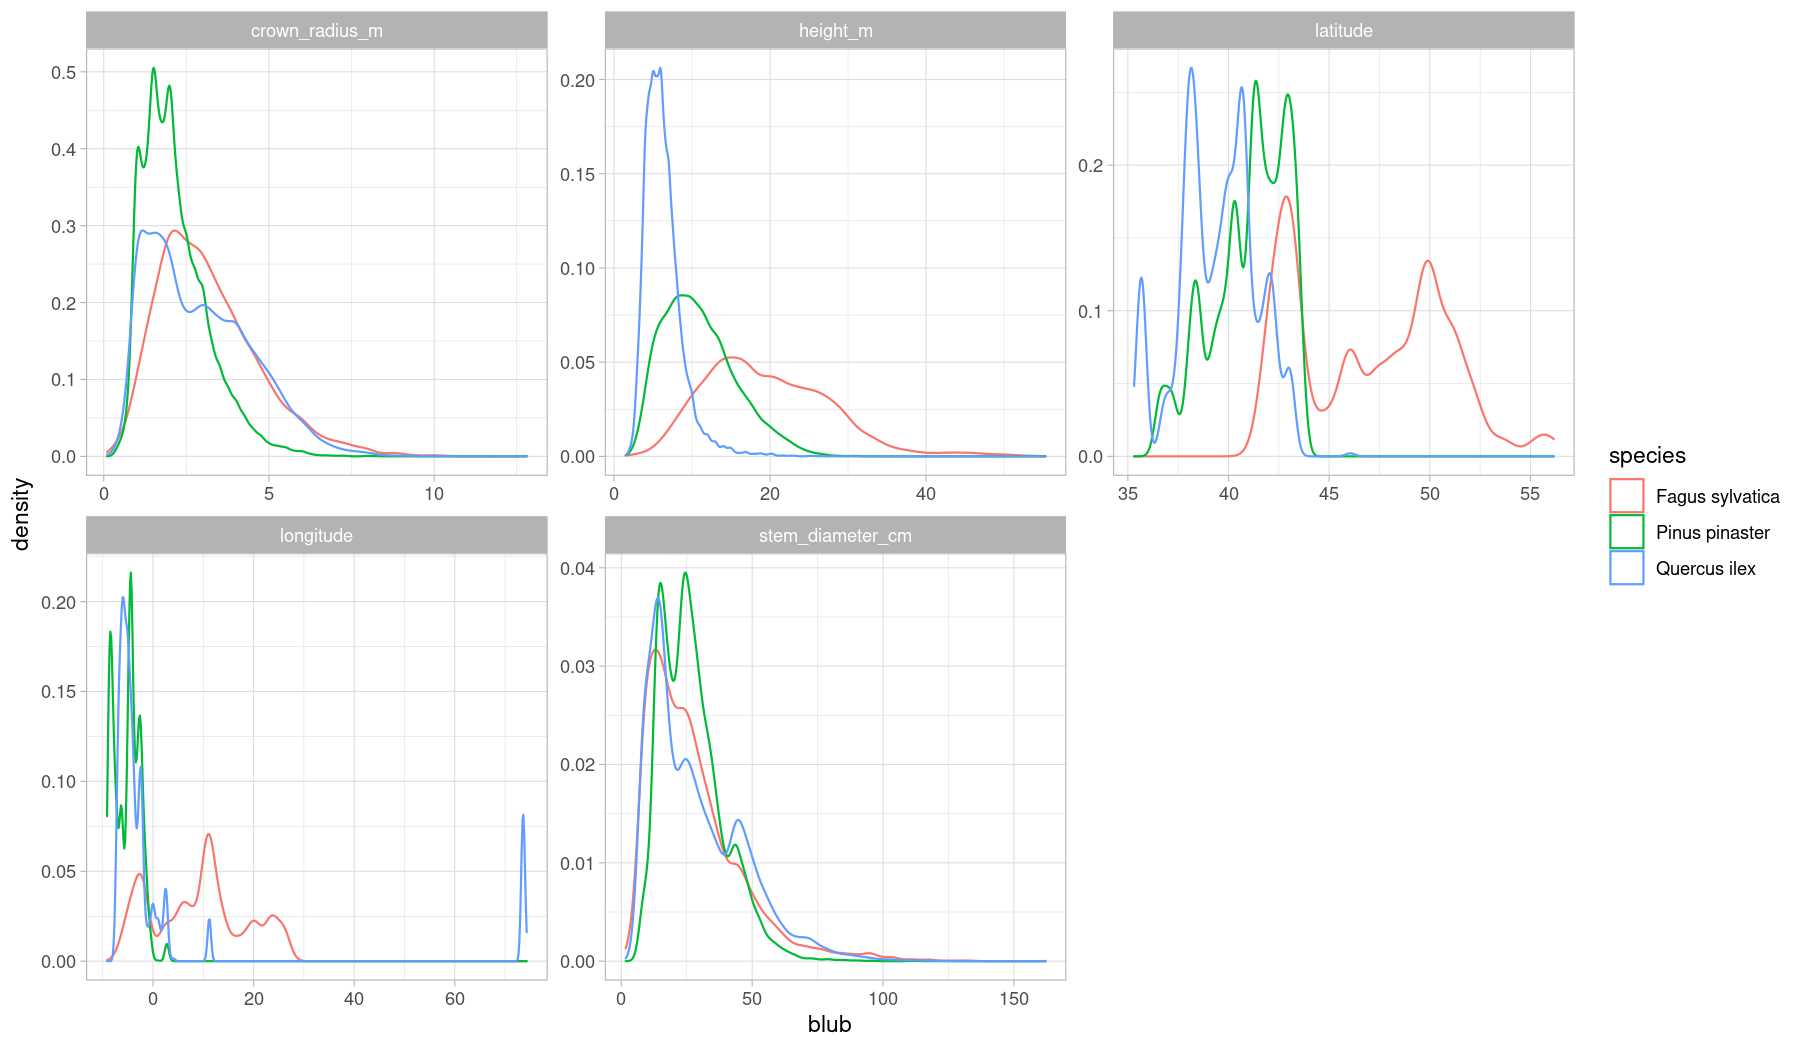

In [81]:
filtered_species %>%
    pivot_longer(names_to = "bla", values_to = "blub", latitude:crown_radius_m) %>%
    ggplot(aes(blub, color=species)) + geom_density() + facet_wrap(~bla, scale="free")

In [79]:
filtered_species %>% count(species)

species,n
<chr>,<int>
Fagus sylvatica,9470
Pinus pinaster,11766
Quercus ilex,22760
